In [1]:
!pip install pyod

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
from pyod.models.abod import ABOD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

In [4]:
import pandas as pd
import numpy as np

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
path_jeu = 'C:/Users/THINKPad/Desktop/ProjetInter/PIP_2022NA/DATA1/DONNEES_CONCAT_TLSE-LD/'
df = pd.read_csv(path_jeu + 'Donnees_v0_NAN_supprimes.csv')

In [7]:
df = df.drop([df.columns[0]],axis = 1)
df

,ID,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,cp_ou_pays,SECTEUR_GESTION,INDICMAIL,INDICTEL,INDICPOR,INDICSMS,...,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Fidelite_calcule,Flag_bq_principale,profil,localisation
0,831pI3Dnm1zz6NG0iCJTfcilQ==,0,0,0,aLÄsb,SECTEUR EST,MAIL_OPTIN,TEL_OPTIN,POR_OPTIN,SMS_OPTIN,...,60.0,42.0,0.0,0.0,15.0,0.0,FI,1.0,Hyper actifs,toulouse
1,831b9S86qzWBJCaqgYOVPwWMQ==,0,0,0,Z0ÎuP,SECTEUR SUD,MAIL_OPTOUT,TEL_OPTIN,POR_OPTIN,SMS_NEUTRE,...,7.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,Digital Ma Banque,toulouse
2,831tT9jw5y/rwwLEMZF7PyE8w==,0,0,0,ëmzXM,SECTEUR NORD,MAIL_OPTOUT,TEL_NEUTRE,POR_OPTOUT,SMS_OPTOUT,...,6.0,6.0,0.0,0.0,0.0,0.0,FI,1.0,Hyper actifs,toulouse
3,8317VwmuKeVaijtrz0cTWOm4A==,0,0,0,å3èJ3,SECTEUR CENTRE,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,SMS_OPTIN,...,41.0,13.0,0.0,0.0,9.0,0.0,FI,1.0,Hyper actifs,toulouse
4,8316U9AkRrt1X0jnjjhpZ+BQg==,0,0,0,j9od0,SECTEUR EST,MAIL_OPTOUT,TEL_OPTIN,POR_OPTIN,SMS_OPTIN,...,14.0,12.0,0.0,0.0,0.0,0.0,FI,1.0,Digital Ma Banque,toulouse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644343,835BpVQQQHihSjU3xazUZuOsA==,0,0,0,phIË9,SECTEUR HAUT LGDC COEUR HERAULT,MAIL_OPTOUT,TEL_NEUTRE,POR_OPTIN,SMS_OPTOUT,...,44.0,1.0,0.0,0.0,0.0,0.0,NF,0.0,Digital Web modéré,languedoc
644344,835IOkfve1trONOYLRgLUxvmw==,0,0,0,ïÎkhw,SECTEUR BEZIERS,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,SMS_OPTIN,...,7.0,36.0,0.0,0.0,0.0,0.0,NF,0.0,Digital Ma Banque,languedoc
644345,8351PG816ln0/sIDd6IBfqnaA==,0,0,0,êO0èä,SECTEUR NIMES,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,SMS_OPTIN,...,1.0,39.0,0.0,0.0,0.0,0.0,NF,0.0,Digital Web modéré,languedoc
644346,835mBEOByTBamgQVgQg771KDA==,1,1,0,q9åmS,SECTEUR HAUT LGDC COEUR HERAULT,MAIL_OPTIN,TEL_NEUTRE,POR_OPTIN,SMS_OPTIN,...,1.0,5.0,0.0,0.0,0.0,0.0,NF,1.0,Full digital,languedoc


In [8]:
quali_col = []
count = 0
for i, name in zip(df.dtypes, df.columns):
    if i == "object":
        quali_col.append(name)

print(len(df.dtypes))

256


In [9]:
data_quanti = df.drop(columns=quali_col)
data_quanti

,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,TOP_E_RELEVE,MESSAGERIE_WEB_ACTIVE,FIAB_TEL_DOMICILE,FIAB_TEL_TRAVAIL,FIAB_TEL_PORTABLE,FIAB_EMAIL,REFUS_SEA,...,top_produit_Credit,top_produit_Epargne,top_produit_Services,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Flag_bq_principale
0,0,0,0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,60.0,42.0,0.0,0.0,15.0,0.0,1.0
1,0,0,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,7.0,6.0,0.0,0.0,0.0,0.0,1.0
2,0,0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,6.0,6.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,41.0,13.0,0.0,0.0,9.0,0.0,1.0
4,0,0,0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,14.0,12.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644343,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0
644344,0,0,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,7.0,36.0,0.0,0.0,0.0,0.0,0.0
644345,0,0,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0
644346,1,1,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,1.0


In [16]:
data_quanti = data_quanti.sample(1000)
data_quanti


,TOP_FRAUDE,TOP_FRAUDE_CARTE,TOP_FRAUDE_VIREMENT,TOP_E_RELEVE,MESSAGERIE_WEB_ACTIVE,FIAB_TEL_DOMICILE,FIAB_TEL_TRAVAIL,FIAB_TEL_PORTABLE,FIAB_EMAIL,REFUS_SEA,...,top_produit_Credit,top_produit_Epargne,top_produit_Services,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Flag_bq_principale
642735,0,0,0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,7.0,7.0,0.0,0.0,0.0,0.0,1.0
445651,0,0,0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,7.0,6.0,0.0,0.0,0.0,0.0,1.0
10949,0,0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,72.0,16.0,0.0,0.0,0.0,0.0,1.0
413982,0,0,0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,21.0,35.0,0.0,0.0,0.0,0.0,0.0
634272,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,91.0,9.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334876,0,0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,15.0,180.0,0.0,0.0,0.0,0.0,1.0
269635,0,0,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,32.0,58.0,0.0,0.0,0.0,0.0,1.0
639308,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,21.0,0.0,0.0,0.0,0.0,0.0
324389,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,46.0,37.0,0.0,0.0,0.0,0.0,1.0


In [17]:
df3 = data_quanti.drop(columns=["TOP_FRAUDE", "TOP_FRAUDE_CARTE", "TOP_FRAUDE_VIREMENT"])
df3

,TOP_E_RELEVE,MESSAGERIE_WEB_ACTIVE,FIAB_TEL_DOMICILE,FIAB_TEL_TRAVAIL,FIAB_TEL_PORTABLE,FIAB_EMAIL,REFUS_SEA,NBJ_CNT_AGENCE_DEPOT_6M,NBJ_CNT_AGENCE_VENTE_6M,NBJ_CNT_RDV_AGENCE_6M,...,top_produit_Credit,top_produit_Epargne,top_produit_Services,mt_factu_ttc_M,mt_factu_ttc_M6,mt_reduc_ttc_M,mt_reduc_ttc_M6,mt_rist_ttc_M,mt_rist_ttc_M6,Flag_bq_principale
642735,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,7.0,7.0,0.0,0.0,0.0,0.0,1.0
445651,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,...,1.0,1.0,1.0,7.0,6.0,0.0,0.0,0.0,0.0,1.0
10949,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,72.0,16.0,0.0,0.0,0.0,0.0,1.0
413982,1.0,1.0,1.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,...,0.0,1.0,1.0,21.0,35.0,0.0,0.0,0.0,0.0,0.0
634272,0.0,1.0,0.0,0.0,1.0,0.0,0.0,8.0,0.0,0.0,...,1.0,1.0,1.0,91.0,9.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334876,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,15.0,180.0,0.0,0.0,0.0,0.0,1.0
269635,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,32.0,58.0,0.0,0.0,0.0,0.0,1.0
639308,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,21.0,0.0,0.0,0.0,0.0,0.0
324389,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,46.0,37.0,0.0,0.0,0.0,0.0,1.0


In [49]:
df3_col = np.array(df3.columns.values.tolist())
df3_col


array(['TOP_E_RELEVE', 'MESSAGERIE_WEB_ACTIVE', 'FIAB_TEL_DOMICILE',
       'FIAB_TEL_TRAVAIL', 'FIAB_TEL_PORTABLE', 'FIAB_EMAIL', 'REFUS_SEA',
       'NBJ_CNT_AGENCE_DEPOT_6M', 'NBJ_CNT_AGENCE_VENTE_6M',
       'NBJ_CNT_RDV_AGENCE_6M', 'NBJ_CNT_AUTOMATE_RETRAIT_6M',
       'NBJ_CNT_AUTOMATES_DEPOT_6M', 'NBJ_CNT_AGENCE_RETRAIT_6M',
       'NBJ_CNT_AGENCE_6M', 'NBJ_CNT_SMS_6M', 'NBJ_CNT_EMAIL_6M',
       'NBJ_CNT_APPELENTRANTS_6M', 'NBJ_CNT_AUTOMATE_6M',
       'NBJ_CNT_LETTRES_6M', 'TOT_CNX_WEB_WEEK_6M', 'TOT_CNX_WEB_END_6M',
       'TOT_CCOMPTE_WEB_6M', 'TOT_IMPRESSIONRIB_WEB_6M',
       'TOT_TLCHGMTEDOC_WEB_6M', 'TOT_CCOMPTE_MBANQUE_6M',
       'TOT_CMS_WEB_6M', 'TOT_CVAD_WEB_6M', 'TOT_VEL_WEB_6M',
       'TOT_ATT_SIGN_VAD_WEB_6M', 'TOT_CHABITAT_WEB_6M',
       'TOT_MODIF_PARAM_CARTE_WEB_6M', 'TOT_CNX_INVSTORE_WEB_6M',
       'NB_JR_WEB_6M', 'NB_CNXS_WEB_6M', 'NB_JR_MBANQUE_6M',
       'NB_CNXS_MBANQUE_6M', 'NB_JR_CABOURSE_6M', 'NB_CNXS_CABOURSE_6M',
       'NB_JR_MACARTE_6M', 'NB_CN

In [18]:
#Mise à l'échelle des données
minmax = MinMaxScaler(feature_range=(0, 1))
a = minmax.fit_transform(df3)
data = pd.DataFrame(a)


In [19]:
 #Définir un rapport anormal
outliers_fraction = 0.01
clf = ABOD(contamination=outliers_fraction)
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
plt.figure(figsize=(20, 15))

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

In [20]:
#Entrainer les donnees
clf.fit(data)


ABOD(contamination=0.01, method='fast', n_neighbors=5)

In [22]:
# Predict outlier score
scores_pred = clf.decision_function(data) * -1
scores_pred
        
  

array([7.14784435e-04, 1.25023041e-04, 6.72508124e-04, 9.15292020e-04,
       3.24433714e-04, 2.91476170e-04, 2.26573771e-04, 1.30052875e-03,
       7.02245421e-04, 5.61480699e-03, 2.03402527e-03, 1.93579579e-04,
       1.63818459e-03, 3.89514721e-03, 6.44172888e-03, 1.78681374e-03,
       1.07687858e-03, 1.01285912e-03, 7.58653233e-03, 1.79255171e-03,
       5.52273164e-04, 2.79047536e-03, 2.80310902e-04, 2.08926677e-03,
       8.96758950e-04, 5.61970446e-03, 3.40062387e-03, 2.16828401e-03,
       2.71022856e-02, 1.06298273e-03, 1.11473565e-02, 1.13300781e-04,
       3.20494350e-05, 4.68630297e-03, 6.13653647e-03, 1.07714880e-03,
       1.28656018e-03, 7.50770834e-04, 2.48928557e-02, 1.03981694e-02,
       1.81623845e-03, 1.23348286e-02, 2.34406605e-04, 4.69412858e-03,
       4.35900943e-04, 1.93789566e-04, 2.87456524e-04, 3.75354407e-03,
       1.20021871e-03, 6.08360952e-04, 2.63552205e-03, 2.26010835e-05,
       4.04598126e-03, 3.57901322e-03, 2.32314182e-05, 1.76100186e-03,
      

In [24]:
# Des données qui prédisent les valeurs aberrantes et les valeurs normales
y_pred = clf.predict(data)
y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [28]:
seuil = np.percentile(scores_pred, 100 * outliers_fraction)
seuil

2.7199849940150102e-05

In [37]:
def evaluation(score: np.ndarray, y: np.ndarray, display=False):
    precision, recall, thresholds = precision_recall_curve(y, score)
    f1_score = 2 * precision * recall / (precision + recall)
    
    value = auc(recall, precision)
    
    if display:
        plt.plot(recall, precision)
        plt.show()
    
    return value, f1_score, precision, recall

In [30]:
from sklearn.metrics import confusion_matrix

<ipython-input-37-57658cd24934>:3: RuntimeWarning: invalid value encountered in true_divide
  f1_score = 2 * precision * recall / (precision + recall)


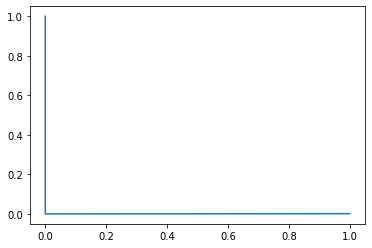

In [38]:
value, f1_score, precision, recall = evaluation(scores_pred, data_quanti["TOP_FRAUDE"], display=True)

In [39]:
print("Air sous la courbe : ", value)

Air sous la courbe :  0.0006393861892583121
